# Hierarchical clustering for all sessions together
## Cluster entire trial, no PSTH

In [1]:
# HIDE CODE 
from steinmetz_book import deps
import pandas as pd
import numpy as np
from importlib import reload
reload(deps)
sp, neu, spykes_times, events_df = deps.concat_all_spikes(do_cluster_alltrial=False, do_reload=False)      

##  Clustered PSTHs 
### Reproduce whole trial from spiketimes

======= Event = trial_start; Condition = [] =======


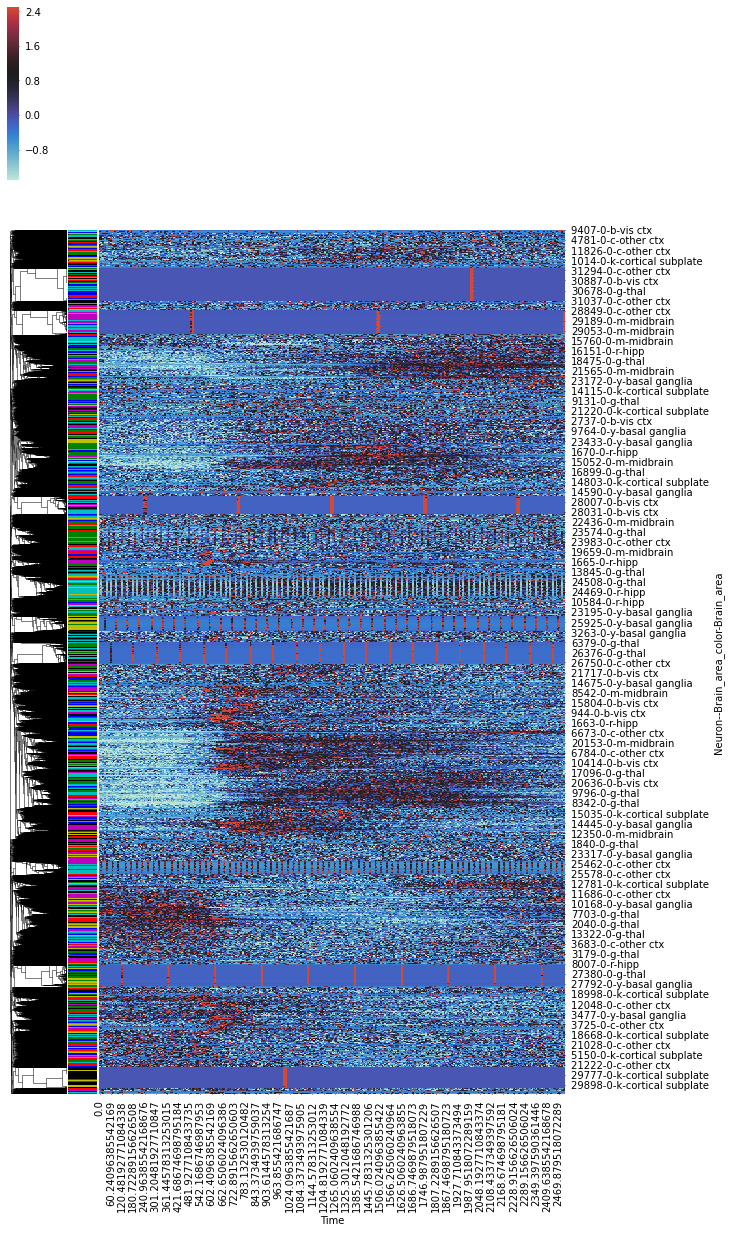

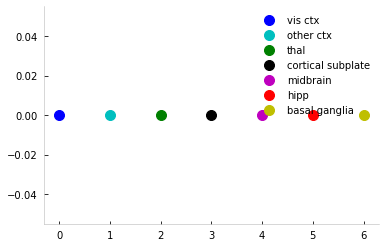

In [2]:
# HIDE CODE
_, all_psth = deps.get_psth(spikes=spykes_times,
                       spykes_df=events_df,
                       event='trial_start', 
                       conditions=[],
                       window=[0, 2500],  
                       bin_size=10,
                       )
all_psth['conditions']=''
# Make psth
xar=deps.spyke2xar(all_psth,
                   spykes_times['brain_group'].values,  
                   spykes_times['brain_group_color'].values)

# Cluster
df,df_tidy,index=deps.cluster(xar,plotose=False,thr_n_spikes=0) 

In [5]:
all_psth['data'][0].shape

(31368, 250)

## Loop over events and conditions

In [4]:
# HIDE CODE
# Make list of events
events=['trial_start']
events.extend(events_df.columns[events_df.columns.str.contains('time')])


for event_name in events:
    for condition_name in events_df.columns[~events_df.columns.str.contains('time')]:
        
        # Some checks
        if event_name=='trial_start':
            window=[0,2500] # Entire trial
        else:
            window=[-500, 500] # 1 sec
        if condition_name=='trial_start':
            continue # not a condition
        
        # Make psth
        _, all_psth = deps.get_psth(spikes=spykes_times,
                               spykes_df=events_df,
                               event=event_name, 
                               conditions=condition_name,
                               window=window,  
                               bin_size=5,
                               )
        # Convert psth
        xar=deps.spyke2xar(all_psth,
                           spykes_times['brain_group'].values,  
                           spykes_times['brain_group_color'].values)

        # Cluster
        df,df_tidy,index=deps.cluster(xar,plotose=True,thr_n_spikes=20)

KeyboardInterrupt: 